In [1]:
!pip install pyFFTW

     |████████████████████████████████| 1.7 MB 12.5 MB/s 


In [26]:
import numpy as np
from numpy import fft
import csv
import locale
from locale import atof
from matplotlib import pyplot as plt
from scipy import fftpack
import pyfftw

In [27]:
data = []
with open('data.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

print(f"Data loaded with {len(data)} values")

ins = np.zeros(1024, dtype=np.complex)

for i, line in enumerate(data):
  ins[i] = complex(atof(line[0]), atof(line[1]))

print(ins)


Data loaded with 1024 values
[-0.4014  -0.35414j  -0.22823 -0.2948j   -0.38421 -0.3589j   ...
  0.085697-0.41562j  -0.096406-0.013268j -0.11643 +0.081237j]


(223.98602756100001+147.10219312j)
[    0.  1000.  2000. ... -3000. -2000. -1000.]


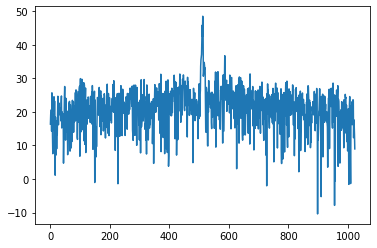

In [30]:
# scipy.fft implementation
out = fft.fft(ins)
freq = fft.fftfreq(len(ins), 1e-3/(1024))
print(out[0])
print(freq)

plt.plot(20*np.log10(np.abs(fft.fftshift(out))))


Data loaded with 1024 values
[-0.4014  -0.35414j  -0.22823 -0.2948j   -0.38421 -0.3589j   ...
  0.085697-0.41562j  -0.096406-0.013268j -0.11643 +0.081237j]
float64
(1024,) (1024,)
[ 223.98602 +147.10219j  -221.59364  -62.07744j    20.037579 -27.680637j
 ...  113.69521  -61.625366j  -29.260542-194.6896j
   11.460744+133.01678j ]


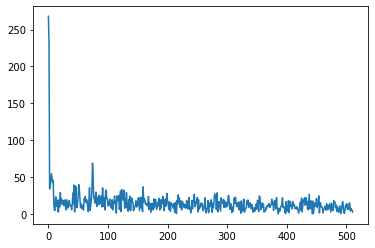

In [37]:
# fftw implementation
a = pyfftw.empty_aligned(1024, dtype=np.csingle, n=16)
o = pyfftw.empty_aligned(1024, dtype=np.csingle, n=16)
window = np.hanning(51)
dataf = []
with open('data.csv', newline='') as f:
    reader = csv.reader(f)
    dataf = list(reader)

print(f"Data loaded with {len(dataf)} values")

for i, line in enumerate(dataf):
  a[i] = complex(atof(line[0]), atof(line[1]))

# input array a
print(a)

win = np.hanning(1024)
win = np.ones(1024)
print(win.dtype)
print(win.shape, a.shape)

u = win * a

fft_object = pyfftw.FFTW(u.astype(np.csingle), o, direction='FFTW_FORWARD')

res = fft_object()

print(res)

#plt.plot(20*np.log10(np.abs(np.fft.fftshift(res))**2))
#plt.plot(20*np.log10(np.abs(np.fft.fftshift(res))))
#plt.plot(np.abs(np.fft.fftshift(res)))
plt.plot(np.abs(np.fft.fftshift(res)[512:]))

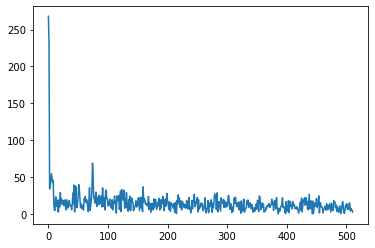

In [36]:
out2 = np.zeros(1024, dtype=np.complex)

data2 = []
with open('out_data.csv', newline='') as f:
    reader = csv.reader(f)
    data2 = list(reader)

for i, line in enumerate(data2):
  out2[i] = complex(atof(line[0]), atof(line[1]))

#plt.plot(10*np.log10(np.abs(np.fft.fftshift(out2))))
plt.plot(np.abs(np.fft.fftshift(out2)[512:]))

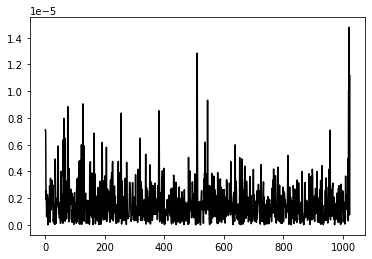

In [28]:
## error

plt.plot(np.abs(np.abs(res) - np.abs(out2)), color="k")